In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.metrics import mean_squared_error
import math
from sklearn.linear_model import LinearRegression

In [2]:
Data=pd.read_csv("./data/Test.csv",encoding='utf-8')
Data=Data[Data['A']=='v']
Data=Data.filter(['State','Region','Politics','Felony_sentence_aver','Temper','GDP','GDP_penalty','PCPI','Education','Happy','MSA_Rate','Traveler_spending','older_rate','Female_Rate','Police_area','Felony_Result','Crimes','Misdemeanor_Result','Gun_ownership'])
Data=Data.sort_values(by='Misdemeanor_Result')
Data

,State,Region,Politics,Felony_sentence_aver,Temper,GDP,GDP_penalty,PCPI,Education,Happy,MSA_Rate,Traveler_spending,older_rate,Female_Rate,Police_area,Felony_Result,Crimes,Misdemeanor_Result,Gun_ownership
34,New Hampshire,northeast,biden,132.000,6.6,87634.1,54.7713,63502,16588,53.36,63.059503,4350.4,18.6,50.4,0.115314,391.095,1448.5,1057.405,39.0
40,Rhode Island,northeast,biden,417.000,10.1,61883.8,82.5117,56361,16954,50.96,100.000000,2289.4,17.7,51.3,0.017400,810.636,1885.2,1074.564,11.0
35,New Jersey,northeast,biden,325.200,11.5,634783.6,846.3781,70471,20316,64.10,100.000000,34055.2,16.6,51.1,0.064537,501.270,1617.0,1115.730,8.0
39,Pennsylvania,northeast,biden,550.000,9.3,808737.5,138.6407,58032,16377,50.16,88.697913,37494.1,18.7,51.0,0.627805,664.002,1794.6,1130.598,37.0
43,Vermont,northeast,biden,447.000,6.1,34013.4,29.1543,55293,20149,55.59,35.322898,2666.3,20.1,50.6,0.118576,315.021,1500.1,1185.079,46.0
16,Alabama,south,trump,402.000,17.1,228142.6,72.0450,44145,9717,40.28,75.183294,11513.8,17.4,51.7,0.617114,2150.976,3360.9,1209.924,50.0
45,Wisconsin,midwest,biden,361.333,6.2,349416.5,91.1521,53227,12446,54.32,74.676604,12516.5,17.5,50.2,0.807805,654.535,1870.1,1215.565,43.0
28,Massachusetts,northeast,biden,906.000,8.8,596593.1,116.9790,74187,18328,57.30,91.382695,24156.5,17.0,51.5,0.113900,387.336,1613.9,1226.564,10.0
26,Maine,northeast,biden,180.000,5.0,67717.1,45.1447,50634,15069,50.12,59.434449,4517.1,21.3,51.0,0.539094,205.968,1471.2,1265.232,45.0
36,New York,northeast,biden,168.800,7.4,1772260.7,2363.0143,71717,23686,54.86,93.042968,83045.2,16.9,51.4,0.487238,519.796,1792.4,1281.846,14.0


In [3]:
trump_data=Data[Data['Politics']=='trump']
biden_data=Data[Data['Politics']=='biden']
trump_data['State']
# Alabama, Idaho, Missouri, Kentucky, Kansas, Nebraska, Iowa, Ohio, Florida, Utah, North Carolina, Texas

16           Alabama
21             Idaho
31          Missouri
25          Kentucky
24            Kansas
32          Nebraska
23              Iowa
38              Ohio
20           Florida
42              Utah
37    North Carolina
41             Texas
Name: State, dtype: object

In [4]:
r_color=['red','cornflowerblue']
politics=['trump','biden']

def make_data(dataframe, data):
    dataframe=dataframe.sort_values(by=data)
    dataframe=dataframe.reset_index()
    return dataframe

def make_plt(dataframe,data,num):
    plt.plot(dataframe[data],dataframe['Misdemeanor_Result'],'o',color=r_color[num],label=politics[num])
    
    
def make_linear(dataframe,data,num):
    linear=LinearRegression()
    linear.fit(dataframe[data].values.reshape(-1,1),dataframe['Misdemeanor_Result'])
    pred=linear.predict(dataframe[data].values.reshape(-1,1))
    plt.plot(dataframe[data],linear.predict(dataframe[data].values.reshape(-1,1)),color=r_color[num])
    
    print("========",politics[num],"======================================")
    
    print('Score : ', linear.score(dataframe[data].values.reshape(-1,1),dataframe['Misdemeanor_Result']))
    print('RMSE : ', mean_squared_error(pred, dataframe['Misdemeanor_Result'])**0.5)
    print('MSE : ', mean_squared_error(pred, dataframe['Misdemeanor_Result']),'\n')
    
    print("기울기 : ",linear.coef_)
    print("절편 : ",linear.intercept_,"\n\n")
    

def make_name(dataframe,data):
    for i, txt in enumerate(dataframe['State']):
        plt.annotate(txt,(dataframe[data][i],dataframe['Misdemeanor_Result'][i]))
        
        
def pearson_corr(dataframe,data,num):
    mis_body=pd.DataFrame({'Misdemeanor':dataframe['Misdemeanor_Result'],data:dataframe[data]})

    mis_pearson_corr=mis_body.corr(method='pearson')
    print("========",politics[num],"======================================")
    print('mis_pearson_corr : {}\n\n'.format(mis_pearson_corr))

# GDP

======== trump ======================================
Score :  0.4980776529736026
RMSE :  245.27150498119255
MSE :  60158.11115573916 

기울기 :  [0.00048838]
절편 :  1518.3162889768948 


======== biden ======================================
Score :  0.09202006095994719
RMSE :  456.5751762009031
MSE :  208460.8915228857 

기울기 :  [0.00019973]
절편 :  1448.023528518221 




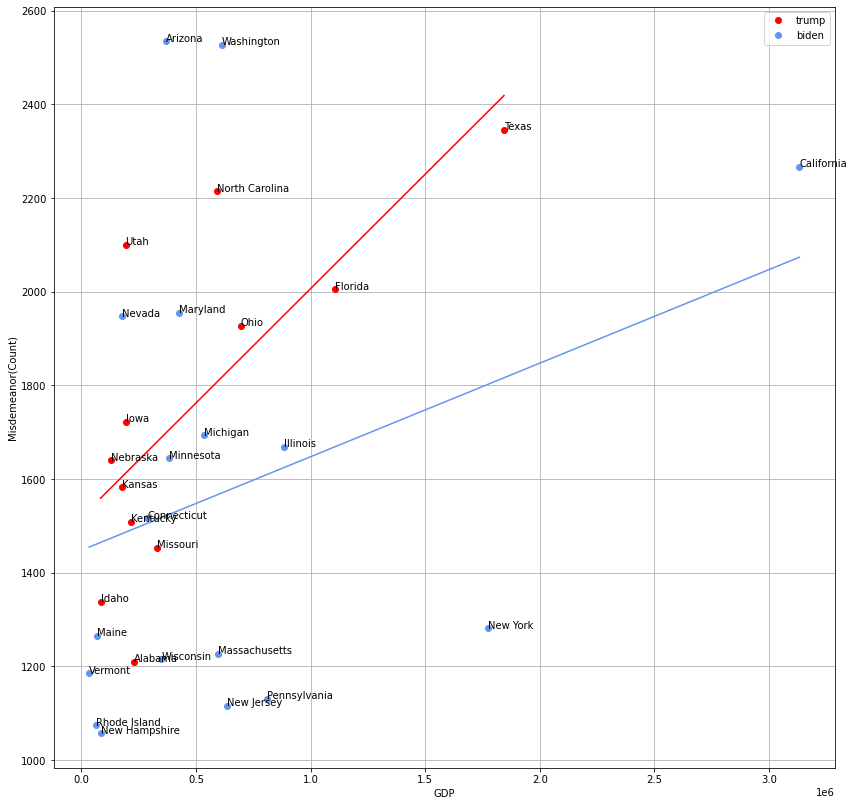

In [5]:
plt.figure(figsize=(14,14))

data='GDP'

GDP_trump=make_data(trump_data,data)
GDP_biden=make_data(biden_data, data)

make_name(GDP_trump,data)
make_name(GDP_biden,data)

make_plt(GDP_trump,data,0)
make_plt(GDP_biden,data,1)

make_linear(GDP_trump,data,0)
make_linear(GDP_biden,data,1)

plt.legend()
#plt.xscale('log')
#plt.yscale('log')
plt.xlabel('GDP')
plt.ylabel('Misdemeanor(Count)')
plt.grid(True)
plt.show()

In [6]:
def spearman_corr(dataframe,data,num):
    mis_body=pd.DataFrame({'Misdemeanor':dataframe['Misdemeanor_Result'],data:dataframe[data]})

    mis_spearman_corr=stats.spearmanr(mis_body.GDP,mis_body.Misdemeanor)
    
    print("========misdemeanor_",politics[num],"======================================")
    print('mis_spearman_corr : {}\n\n'.format(mis_spearman_corr))
    
    fel_body=pd.DataFrame({'Felony':dataframe['Felony_Result'],data:dataframe[data]})

    fel_spearman_corr=stats.spearmanr(fel_body.GDP,fel_body.Felony)
    
    print("========felony_",politics[num],"======================================")
    print('fel_spearman_corr : {}\n\n'.format(fel_spearman_corr))


spearman_corr(trump_data,'GDP',0)
spearman_corr(biden_data,'GDP',1)

========misdemeanor_ trump ======================================
mis_spearman_corr : SpearmanrResult(correlation=0.5174825174825175, pvalue=0.08486877113393493)


========felony_ trump ======================================
fel_spearman_corr : SpearmanrResult(correlation=-0.02097902097902098, pvalue=0.9484022252365223)


========misdemeanor_ biden ======================================
mis_spearman_corr : SpearmanrResult(correlation=0.3312693498452013, pvalue=0.179322144399268)


========felony_ biden ======================================
fel_spearman_corr : SpearmanrResult(correlation=0.21568627450980388, pvalue=0.3900270258208054)




In [7]:
pearson_corr(GDP_trump,data,0)
pearson_corr(GDP_biden,data,1)

======== trump ======================================
mis_pearson_corr :              Misdemeanor       GDP
Misdemeanor     1.000000  0.705746
GDP             0.705746  1.000000


======== biden ======================================
mis_pearson_corr :              Misdemeanor       GDP
Misdemeanor     1.000000  0.303348
GDP             0.303348  1.000000




In [8]:
import statsmodels.api as sm

mis_model_GDP_trump = sm.OLS(trump_data['Misdemeanor_Result'],trump_data['GDP'])
mis_result_GDP_trump = mis_model_GDP_trump.fit()
print(mis_result_GDP_trump.summary())

mis_model_GDP_biden = sm.OLS(biden_data['Misdemeanor_Result'],biden_data['GDP'])
mis_result_GDP_biden = mis_model_GDP_biden.fit()
print(mis_result_GDP_biden.summary())

                                 OLS Regression Results                                
Dep. Variable:     Misdemeanor_Result   R-squared (uncentered):                   0.607
Model:                            OLS   Adj. R-squared (uncentered):              0.572
Method:                 Least Squares   F-statistic:                              17.01
Date:                Mon, 08 Nov 2021   Prob (F-statistic):                     0.00169
Time:                        14:15:12   Log-Likelihood:                         -101.28
No. Observations:                  12   AIC:                                      204.6
Df Residuals:                      11   BIC:                                      205.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


# Education

======== trump ======================================
Score :  0.023119236362739604
RMSE :  342.1760500735032
MSE :  117084.44924390456 

기울기 :  [-0.0320224]
절편 :  2085.756787345035 


======== biden ======================================
Score :  0.430827245102111
RMSE :  361.4899438375617
MSE :  130674.97949568352 

기울기 :  [-0.0792602]
절편 :  2800.2027885850057 




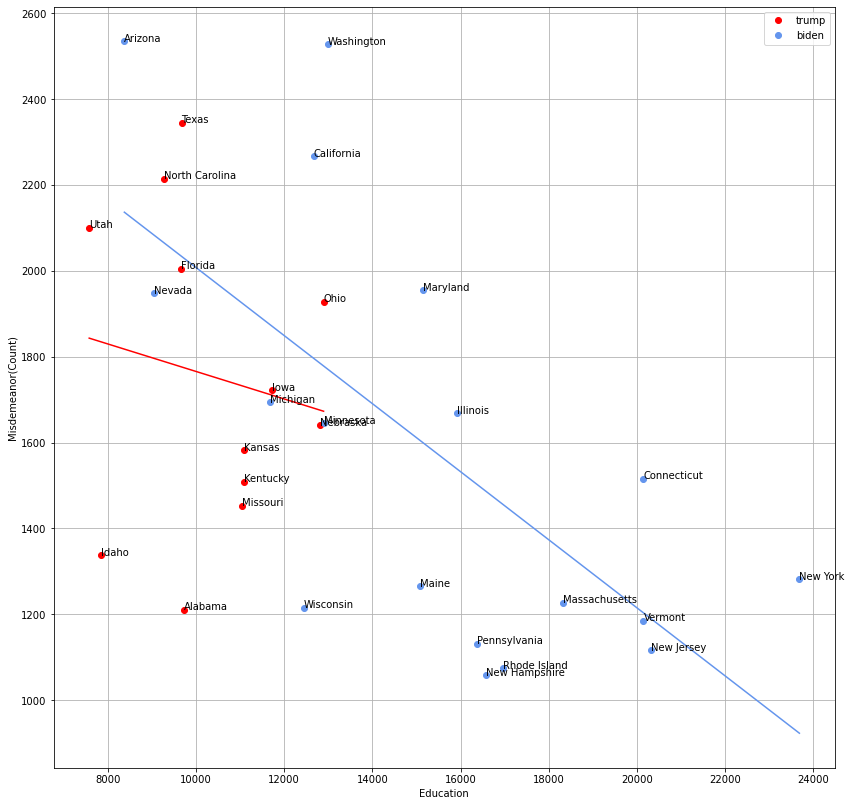

In [9]:
plt.figure(figsize=(14,14))

data='Education'

Education_trump=make_data(trump_data,data)
Education_biden=make_data(biden_data, data)

make_name(Education_trump,data)
make_name(Education_biden,data)

make_plt(Education_trump,data,0)
make_plt(Education_biden,data,1)

make_linear(Education_trump,data,0)
make_linear(Education_biden,data,1)

plt.legend()
#plt.xscale('log')
#plt.yscale('log')
plt.xlabel('Education')
plt.ylabel('Misdemeanor(Count)')
plt.grid(True)
plt.show()

In [10]:
def spearman_corr(dataframe,data,num):
    mis_body=pd.DataFrame({'Misdemeanor':dataframe['Misdemeanor_Result'],data:dataframe[data]})

    mis_spearman_corr=stats.spearmanr(mis_body.Education,mis_body.Misdemeanor)
    
    print("========misdemeanor_",politics[num],"======================================")
    print('mis_spearman_corr : {}\n\n'.format(mis_spearman_corr))
    
    fel_body=pd.DataFrame({'Felony':dataframe['Felony_Result'],data:dataframe[data]})

    fel_spearman_corr=stats.spearmanr(fel_body.Education,fel_body.Felony)
    
    print("========felony_",politics[num],"======================================")
    print('fel_spearman_corr : {}\n\n'.format(fel_spearman_corr))


spearman_corr(trump_data,'Education',0)
spearman_corr(biden_data,'Education',1)

========misdemeanor_ trump ======================================
mis_spearman_corr : SpearmanrResult(correlation=-0.1958041958041958, pvalue=0.5419358857313175)


========felony_ trump ======================================
fel_spearman_corr : SpearmanrResult(correlation=0.2867132867132868, pvalue=0.36625146058358227)


========misdemeanor_ biden ======================================
mis_spearman_corr : SpearmanrResult(correlation=-0.6367389060887513, pvalue=0.004489848099432227)


========felony_ biden ======================================
fel_spearman_corr : SpearmanrResult(correlation=-0.4303405572755417, pvalue=0.07464277608599114)




In [11]:
pearson_corr(Education_trump,'Education',0)
pearson_corr(Education_biden,'Education',1)

======== trump ======================================
mis_pearson_corr :              Misdemeanor  Education
Misdemeanor      1.00000   -0.15205
Education       -0.15205    1.00000


======== biden ======================================
mis_pearson_corr :              Misdemeanor  Education
Misdemeanor     1.000000  -0.656374
Education      -0.656374   1.000000




In [12]:
mis_model_Education_trump = sm.OLS(trump_data['Misdemeanor_Result'],trump_data['Education'])
mis_result_Education_trump = mis_model_Education_trump.fit()
print(mis_result_Education_trump.summary())

mis_model_Education_biden = sm.OLS(biden_data['Misdemeanor_Result'],biden_data['Education'])
mis_result_Education_biden = mis_model_Education_biden.fit()
print(mis_result_Education_biden.summary())

                                 OLS Regression Results                                
Dep. Variable:     Misdemeanor_Result   R-squared (uncentered):                   0.930
Model:                            OLS   Adj. R-squared (uncentered):              0.924
Method:                 Least Squares   F-statistic:                              146.1
Date:                Mon, 08 Nov 2021   Prob (F-statistic):                    1.08e-07
Time:                        14:15:12   Log-Likelihood:                         -90.939
No. Observations:                  12   AIC:                                      183.9
Df Residuals:                      11   BIC:                                      184.4
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


# Happy

======== trump ======================================
Score :  0.09882895766253941
RMSE :  328.6490973435846
MSE :  108010.22918475293 

기울기 :  [12.82514982]
절편 :  1090.749650081599 


======== biden ======================================
Score :  0.020264305701961027
RMSE :  474.2732542730103
MSE :  224935.11971871147 

기울기 :  [13.51763727]
절편 :  822.4238572154434 




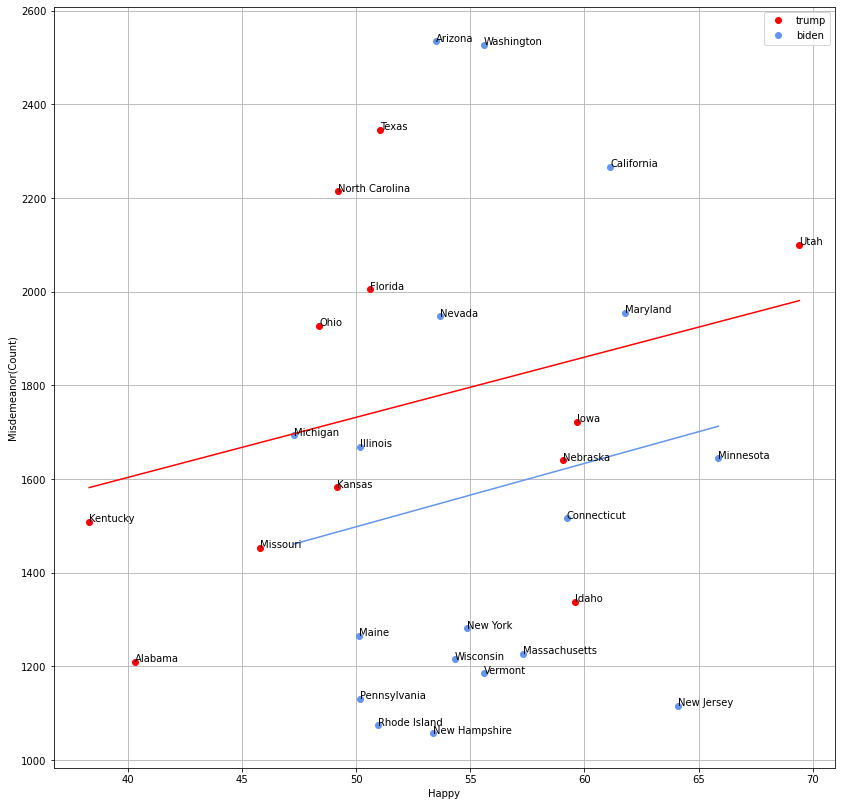

In [13]:
plt.figure(figsize=(14,14))

data='Happy'

Happy_trump=make_data(trump_data,data)
Happy_biden=make_data(biden_data, data)

make_name(Happy_trump,data)
make_name(Happy_biden,data)

make_plt(Happy_trump,data,0)
make_plt(Happy_biden,data,1)

make_linear(Happy_trump,data,0)
make_linear(Happy_biden,data,1)

plt.legend()
#plt.xscale('log')
#plt.yscale('log')
plt.xlabel('Happy')
plt.ylabel('Misdemeanor(Count)')
plt.grid(True)
plt.show()

In [14]:
def spearman_corr(dataframe,data,num):
    mis_body=pd.DataFrame({'Misdemeanor':dataframe['Misdemeanor_Result'],data:dataframe[data]})

    mis_spearman_corr=stats.spearmanr(mis_body.Happy,mis_body.Misdemeanor)
    
    print("========misdemeanor_",politics[num],"======================================")
    print('mis_spearman_corr : {}\n\n'.format(mis_spearman_corr))
    
    fel_body=pd.DataFrame({'Felony':dataframe['Felony_Result'],data:dataframe[data]})

    fel_spearman_corr=stats.spearmanr(fel_body.Happy,fel_body.Felony)
    
    print("========felony_",politics[num],"======================================")
    print('fel_spearman_corr : {}\n\n'.format(fel_spearman_corr))


spearman_corr(trump_data,'Happy',0)
spearman_corr(biden_data,'Happy',1)

========misdemeanor_ trump ======================================
mis_spearman_corr : SpearmanrResult(correlation=0.4265734265734266, pvalue=0.16669998762494495)


========felony_ trump ======================================
fel_spearman_corr : SpearmanrResult(correlation=-0.6923076923076924, pvalue=0.012593030496094107)


========misdemeanor_ biden ======================================
mis_spearman_corr : SpearmanrResult(correlation=0.15170278637770898, pvalue=0.5479006675946312)


========felony_ biden ======================================
fel_spearman_corr : SpearmanrResult(correlation=-0.11661506707946334, pvalue=0.6449317151979074)




In [15]:
pearson_corr(Happy_trump,data,0)
pearson_corr(Happy_biden,data,1)

======== trump ======================================
mis_pearson_corr :              Misdemeanor     Happy
Misdemeanor     1.000000  0.314371
Happy           0.314371  1.000000


======== biden ======================================
mis_pearson_corr :              Misdemeanor     Happy
Misdemeanor     1.000000  0.142353
Happy           0.142353  1.000000




# PCPI

======== trump ======================================
Score :  0.2067892817327398
RMSE :  308.3352067952
MSE :  95070.59974943877 

기울기 :  [0.04541817]
절편 :  -496.22575791597797 


======== biden ======================================
Score :  0.030920119310684058
RMSE :  471.6870546846583
MSE :  222488.67755708782 

기울기 :  [-0.0095359]
절편 :  2150.4700978959436 




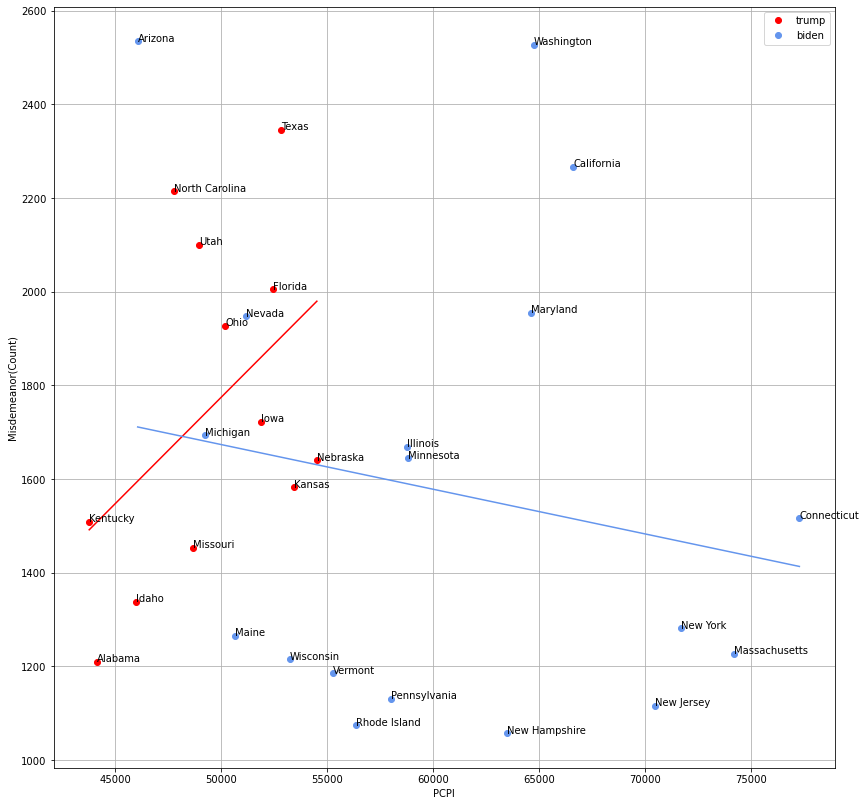

In [16]:
plt.figure(figsize=(14,14))

data='PCPI'

PCPI_trump=make_data(trump_data,data)
PCPI_biden=make_data(biden_data, data)

make_name(PCPI_trump,data)
make_name(PCPI_biden,data)

make_plt(PCPI_trump,data,0)
make_plt(PCPI_biden,data,1)

make_linear(PCPI_trump,data,0)
make_linear(PCPI_biden,data,1)

plt.legend()
#plt.xscale('log')
#plt.yscale('log')
plt.xlabel('PCPI')
plt.ylabel('Misdemeanor(Count)')
plt.grid(True)
plt.show()

In [17]:
def spearman_corr(dataframe,data,num):
    mis_body=pd.DataFrame({'Misdemeanor':dataframe['Misdemeanor_Result'],data:dataframe[data]})

    mis_spearman_corr=stats.spearmanr(mis_body.PCPI,mis_body.Misdemeanor)
    
    print("========misdemeanor_",politics[num],"======================================")
    print('mis_spearman_corr : {}\n\n'.format(mis_spearman_corr))
    
    fel_body=pd.DataFrame({'Felony':dataframe['Felony_Result'],data:dataframe[data]})

    fel_spearman_corr=stats.spearmanr(fel_body.PCPI,fel_body.Felony)
    
    print("========felony_",politics[num],"======================================")
    print('fel_spearman_corr : {}\n\n'.format(fel_spearman_corr))


spearman_corr(trump_data,'PCPI',0)
spearman_corr(biden_data,'PCPI',1)

========misdemeanor_ trump ======================================
mis_spearman_corr : SpearmanrResult(correlation=0.44755244755244755, pvalue=0.14458630130334754)


========felony_ trump ======================================
fel_spearman_corr : SpearmanrResult(correlation=-0.04895104895104895, pvalue=0.8799185788786749)


========misdemeanor_ biden ======================================
mis_spearman_corr : SpearmanrResult(correlation=-0.10835913312693499, pvalue=0.6686595229846739)


========felony_ biden ======================================
fel_spearman_corr : SpearmanrResult(correlation=-0.2198142414860681, pvalue=0.3807953913501375)




In [18]:
pearson_corr(PCPI_trump,data,0)
pearson_corr(PCPI_biden,data,1)

======== trump ======================================
mis_pearson_corr :              Misdemeanor      PCPI
Misdemeanor     1.000000  0.454741
PCPI            0.454741  1.000000


======== biden ======================================
mis_pearson_corr :              Misdemeanor      PCPI
Misdemeanor     1.000000 -0.175841
PCPI           -0.175841  1.000000




# GDP_penalty

======== trump ======================================
Score :  0.3770963143114844
RMSE :  273.2368564039711
MSE :  74658.37969752432 

기울기 :  [0.43098556]
절편 :  1532.136188209161 


======== biden ======================================
Score :  0.05100592093758227
RMSE :  466.7732078112727
MSE :  217877.2275304256 

기울기 :  [0.12937553]
절편 :  1502.6681495524892 




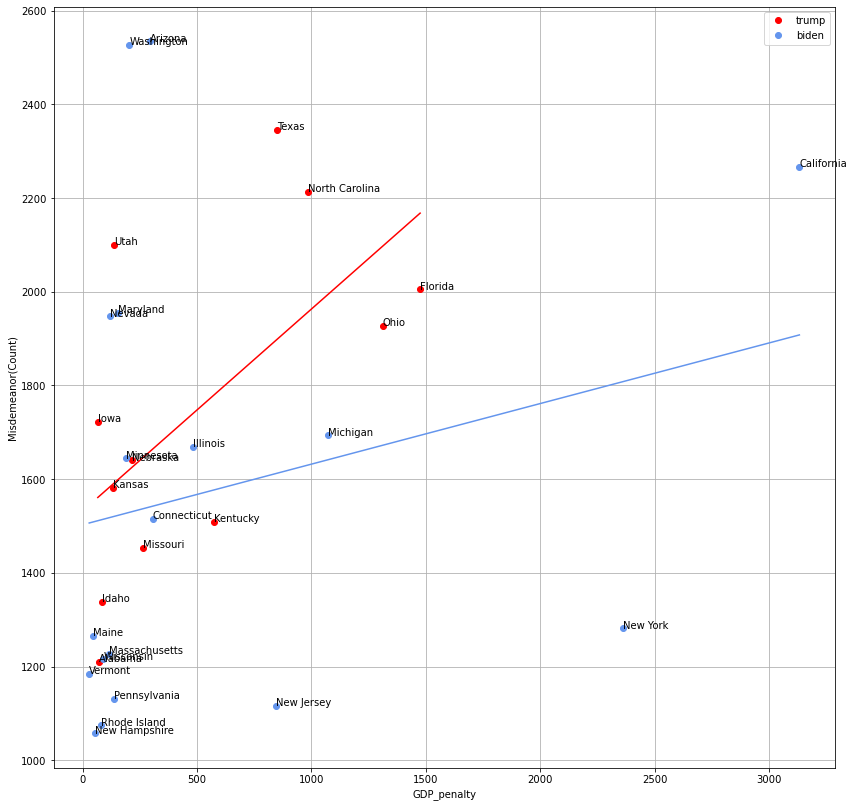

In [19]:
plt.figure(figsize=(14,14))

data='GDP_penalty'

GDP_penalty_trump=make_data(trump_data,data)
GDP_penalty_biden=make_data(biden_data, data)

make_name(GDP_penalty_trump,data)
make_name(GDP_penalty_biden,data)

make_plt(GDP_penalty_trump,data,0)
make_plt(GDP_penalty_biden,data,1)

make_linear(GDP_penalty_trump,data,0)
make_linear(GDP_penalty_biden,data,1)

plt.legend()
#plt.xscale('log')
#plt.yscale('log')
plt.xlabel('GDP_penalty')
plt.ylabel('Misdemeanor(Count)')
plt.grid(True)
plt.show()

In [20]:
def spearman_corr(dataframe,data,num):
    mis_body=pd.DataFrame({'Misdemeanor':dataframe['Misdemeanor_Result'],'GDP_penalty':dataframe['GDP_penalty']})

    mis_spearman_corr=stats.spearmanr(mis_body.GDP_penalty,mis_body.Misdemeanor)
    
    print("========misdemeanor_",politics[num],"======================================")
    print('mis_spearman_corr : {}\n\n'.format(mis_spearman_corr))
    
    fel_body=pd.DataFrame({'Felony':dataframe['Felony_Result'],'Felony_sentence_aver':dataframe['Felony_sentence_aver']})

    fel_spearman_corr=stats.spearmanr(fel_body.Felony_sentence_aver,fel_body.Felony)
    
    print("========felony_",politics[num],"======================================")
    print('fel_spearman_corr : {}\n\n'.format(fel_spearman_corr))


spearman_corr(trump_data,'PCPI',0)
spearman_corr(biden_data,'PCPI',1)

========misdemeanor_ trump ======================================
mis_spearman_corr : SpearmanrResult(correlation=0.5664335664335665, pvalue=0.054842119775407844)


========felony_ trump ======================================
fel_spearman_corr : SpearmanrResult(correlation=-0.34325796948578974, pvalue=0.27467140968540055)


========misdemeanor_ biden ======================================
mis_spearman_corr : SpearmanrResult(correlation=0.5149638802889577, pvalue=0.028748754882630335)


========felony_ biden ======================================
fel_spearman_corr : SpearmanrResult(correlation=0.19504643962848298, pvalue=0.43798642970216684)




In [21]:
pearson_corr(GDP_penalty_trump,data,0)
pearson_corr(GDP_penalty_biden,data,1)

======== trump ======================================
mis_pearson_corr :              Misdemeanor  GDP_penalty
Misdemeanor     1.000000     0.614082
GDP_penalty     0.614082     1.000000


======== biden ======================================
mis_pearson_corr :              Misdemeanor  GDP_penalty
Misdemeanor     1.000000     0.225845
GDP_penalty     0.225845     1.000000




# Area_police

======== trump ======================================
Score :  0.2685390568372702
RMSE :  296.0904504263022
MSE :  87669.55483365052 

기울기 :  [182.63134019]
절편 :  1533.3108609213755 


======== biden ======================================
Score :  0.5612686190225963
RMSE :  317.37558786092325
MSE :  100727.26377006662 

기울기 :  [559.12710943]
절편 :  1167.733942730451 




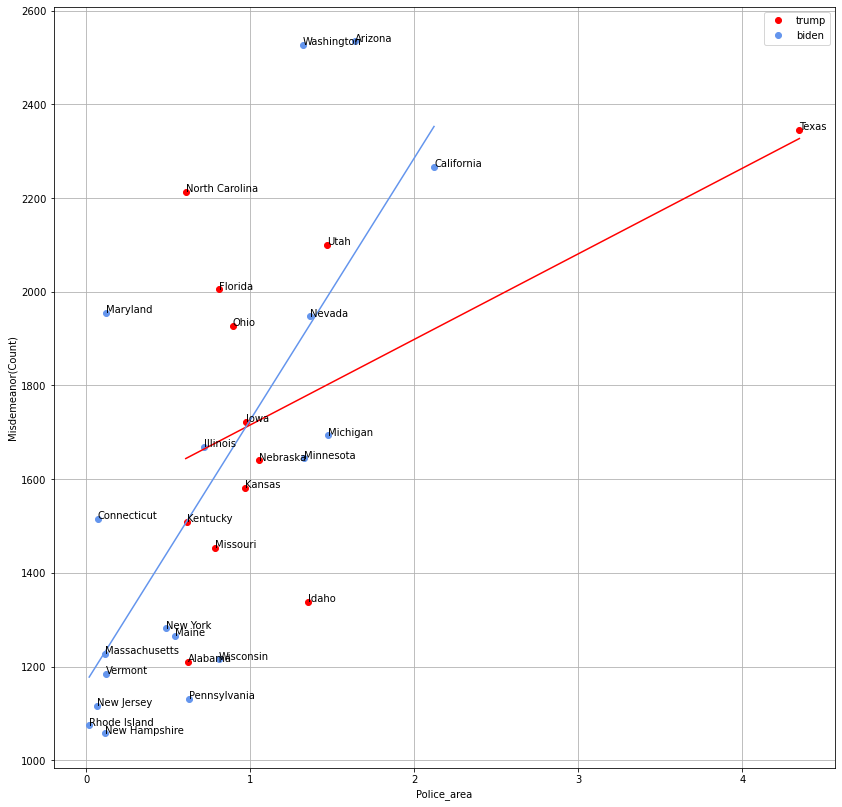

In [22]:
plt.figure(figsize=(14,14))

data='Police_area'

Police_area_trump=make_data(trump_data,data)
Police_area_biden=make_data(biden_data, data)

make_name(Police_area_trump,data)
make_name(Police_area_biden,data)

make_plt(Police_area_trump,data,0)
make_plt(Police_area_biden,data,1)

make_linear(Police_area_trump,data,0)
make_linear(Police_area_biden,data,1)

plt.legend()
#plt.xscale('log')
#plt.yscale('log')
plt.xlabel('Police_area')
plt.ylabel('Misdemeanor(Count)')
plt.grid(True)
plt.show()

In [23]:
def spearman_corr(dataframe,data,num):
    mis_body=pd.DataFrame({'Misdemeanor':dataframe['Misdemeanor_Result'],data:dataframe[data]})

    mis_spearman_corr=stats.spearmanr(mis_body.Police_area,mis_body.Misdemeanor)
    
    print("========misdemeanor_",politics[num],"======================================")
    print('mis_spearman_corr : {}\n\n'.format(mis_spearman_corr))
    
    fel_body=pd.DataFrame({'Felony':dataframe['Felony_Result'],data:dataframe[data]})

    fel_spearman_corr=stats.spearmanr(fel_body.Police_area,fel_body.Felony)
    
    print("========felony_",politics[num],"======================================")
    print('fel_spearman_corr : {}\n\n'.format(fel_spearman_corr))


spearman_corr(trump_data,'Police_area',0)
spearman_corr(biden_data,'Police_area',1)

========misdemeanor_ trump ======================================
mis_spearman_corr : SpearmanrResult(correlation=0.27272727272727276, pvalue=0.3910967709418962)


========felony_ trump ======================================
fel_spearman_corr : SpearmanrResult(correlation=-0.46153846153846156, pvalue=0.13094806950717278)


========misdemeanor_ biden ======================================
mis_spearman_corr : SpearmanrResult(correlation=0.7358101135190918, pvalue=0.0005000834138759303)


========felony_ biden ======================================
fel_spearman_corr : SpearmanrResult(correlation=0.3663570691434469, pvalue=0.13483747906980872)




In [24]:
pearson_corr(Police_area_trump,data,0)
pearson_corr(Police_area_biden,data,1)

======== trump ======================================
mis_pearson_corr :              Misdemeanor  Police_area
Misdemeanor     1.000000     0.518208
Police_area     0.518208     1.000000


======== biden ======================================
mis_pearson_corr :              Misdemeanor  Police_area
Misdemeanor     1.000000     0.749179
Police_area     0.749179     1.000000




# MSA

======== trump ======================================
Score :  0.4382255416309798
RMSE :  259.4835462875888
MSE :  67331.71079398323 

기울기 :  [18.77497978]
절편 :  309.5677054850546 


======== biden ======================================
Score :  0.0926493345006012
RMSE :  456.41693455776976
MSE :  208316.4181511115 

기울기 :  [8.83693218]
절편 :  830.0447400468439 




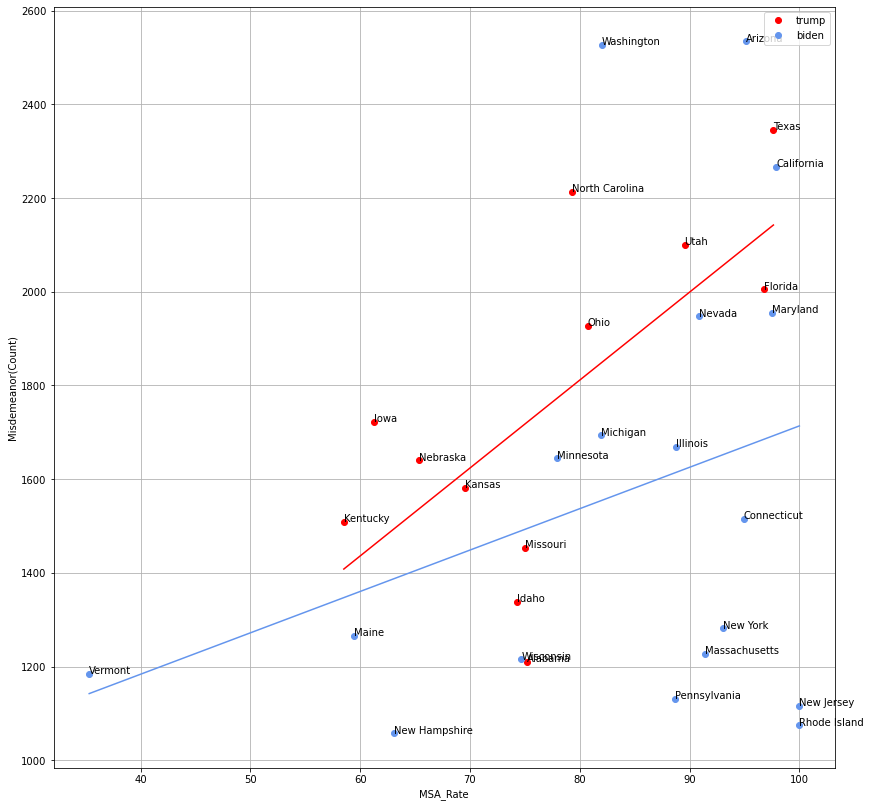

In [25]:
plt.figure(figsize=(14,14))

data='MSA_Rate'

MSA_Rate_trump=make_data(trump_data,data)
MSA_Rate_biden=make_data(biden_data, data)

make_name(MSA_Rate_trump,data)
make_name(MSA_Rate_biden,data)

make_plt(MSA_Rate_trump,data,0)
make_plt(MSA_Rate_biden,data,1)

make_linear(MSA_Rate_trump,data,0)
make_linear(MSA_Rate_biden,data,1)

plt.legend()
#plt.xscale('log')
#plt.yscale('log')
plt.xlabel('MSA_Rate')
plt.ylabel('Misdemeanor(Count)')
plt.grid(True)
plt.show()

In [26]:
def spearman_corr(dataframe,data,num):
    mis_body=pd.DataFrame({'Misdemeanor':dataframe['Misdemeanor_Result'],data:dataframe[data]})

    mis_spearman_corr=stats.spearmanr(mis_body.MSA_Rate,mis_body.Misdemeanor)
    
    print("========misdemeanor_",politics[num],"======================================")
    print('mis_spearman_corr : {}\n\n'.format(mis_spearman_corr))
    
    fel_body=pd.DataFrame({'Felony':dataframe['Felony_Result'],data:dataframe[data]})

    fel_spearman_corr=stats.spearmanr(fel_body.MSA_Rate,fel_body.Felony)
    
    print("========felony_",politics[num],"======================================")
    print('fel_spearman_corr : {}\n\n'.format(fel_spearman_corr))


spearman_corr(trump_data,'MSA_Rate',0)
spearman_corr(biden_data,'MSA_Rate',1)

========misdemeanor_ trump ======================================
mis_spearman_corr : SpearmanrResult(correlation=0.6083916083916086, pvalue=0.035805997052029234)


========felony_ trump ======================================
fel_spearman_corr : SpearmanrResult(correlation=-0.14685314685314685, pvalue=0.6487957097846664)


========misdemeanor_ biden ======================================
mis_spearman_corr : SpearmanrResult(correlation=0.1879194881300326, pvalue=0.4552271033852514)


========felony_ biden ======================================
fel_spearman_corr : SpearmanrResult(correlation=0.2860093308352694, pvalue=0.24991429198153772)




In [27]:
pearson_corr(MSA_Rate_trump,data,0)
pearson_corr(MSA_Rate_biden,data,1)

======== trump ======================================
mis_pearson_corr :              Misdemeanor  MSA_Rate
Misdemeanor     1.000000  0.661986
MSA_Rate        0.661986  1.000000


======== biden ======================================
mis_pearson_corr :              Misdemeanor  MSA_Rate
Misdemeanor     1.000000  0.304384
MSA_Rate        0.304384  1.000000




# Olde_rate

======== trump ======================================
Score :  0.11245947066683615
RMSE :  326.15416353801
MSE :  106376.53839317895 

기울기 :  [-51.06729292]
절편 :  2592.6008695097207 


======== biden ======================================
Score :  0.2638723487692489
RMSE :  411.10308372597916
MSE :  169005.74544900944 

기울기 :  [-159.49825965]
절편 :  4345.219080290836 




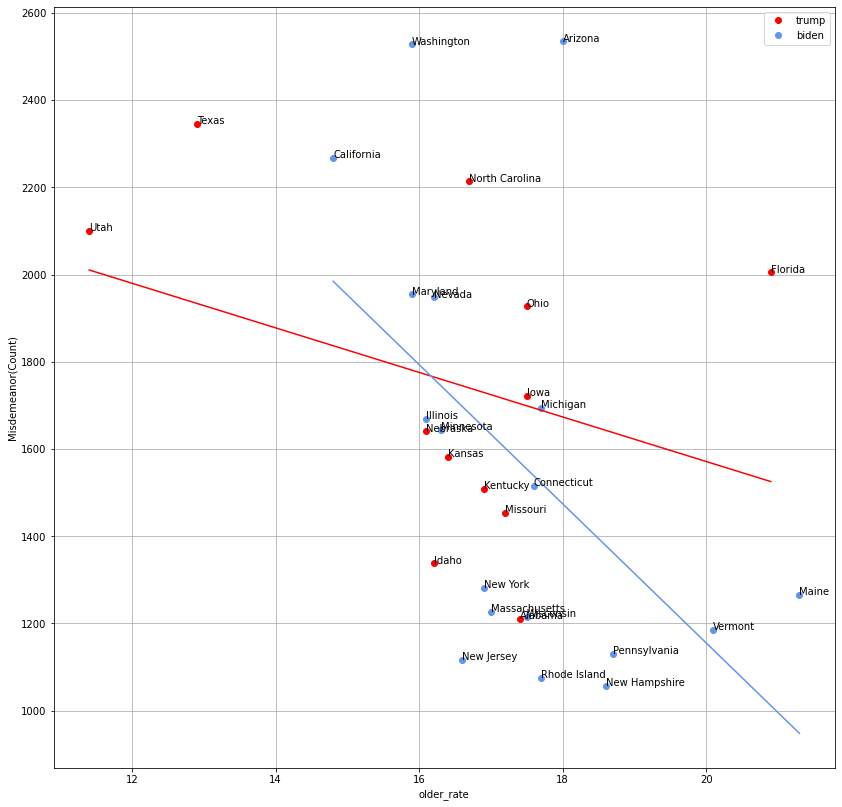

In [28]:
plt.figure(figsize=(14,14))

data='older_rate'

older_rate_trump=make_data(trump_data,data)
older_rate_biden=make_data(biden_data, data)

make_name(older_rate_trump,data)
make_name(older_rate_biden,data)

make_plt(older_rate_trump,data,0)
make_plt(older_rate_biden,data,1)

make_linear(older_rate_trump,data,0)
make_linear(older_rate_biden,data,1)

plt.legend()
#plt.xscale('log')
#plt.yscale('log')
plt.xlabel('older_rate')
plt.ylabel('Misdemeanor(Count)')
plt.grid(True)
plt.show()

In [29]:
def spearman_corr(dataframe,data,num):
    mis_body=pd.DataFrame({'Misdemeanor':dataframe['Misdemeanor_Result'],data:dataframe[data]})

    mis_spearman_corr=stats.spearmanr(mis_body.older_rate,mis_body.Misdemeanor)
    
    print("========misdemeanor_",politics[num],"======================================")
    print('mis_spearman_corr : {}\n\n'.format(mis_spearman_corr))
    
    fel_body=pd.DataFrame({'Felony':dataframe['Felony_Result'],data:dataframe[data]})

    fel_spearman_corr=stats.spearmanr(fel_body.older_rate,fel_body.Felony)
    
    print("========felony_",politics[num],"======================================")
    print('fel_spearman_corr : {}\n\n'.format(fel_spearman_corr))


spearman_corr(trump_data,'older_rate',0)
spearman_corr(biden_data,'older_rate',1)

========misdemeanor_ trump ======================================
mis_spearman_corr : SpearmanrResult(correlation=-0.20665530815981217, pvalue=0.5193022970166132)


========felony_ trump ======================================
fel_spearman_corr : SpearmanrResult(correlation=0.15761845537612793, pvalue=0.6246756664067579)


========misdemeanor_ biden ======================================
mis_spearman_corr : SpearmanrResult(correlation=-0.5599176541464271, pvalue=0.01567132593928971)


========felony_ biden ======================================
fel_spearman_corr : SpearmanrResult(correlation=-0.44938040508061955, pvalue=0.06135622454786433)




In [30]:
pearson_corr(older_rate_trump,data,0)
pearson_corr(older_rate_biden,data,1)

======== trump ======================================
mis_pearson_corr :              Misdemeanor  older_rate
Misdemeanor      1.00000    -0.33535
older_rate      -0.33535     1.00000


======== biden ======================================
mis_pearson_corr :              Misdemeanor  older_rate
Misdemeanor     1.000000   -0.513685
older_rate     -0.513685    1.000000




# Gender(Female)

======== trump ======================================
Score :  0.008161011508681315
RMSE :  344.78583713678466
MSE :  118877.2734901134 

기울기 :  [-50.42282671]
절편 :  4304.375234657077 


======== biden ======================================
Score :  0.2389443756533871
RMSE :  418.00585854084954
MSE :  174728.89777447272 

기울기 :  [-433.09438582]
절편 :  23549.741666948106 




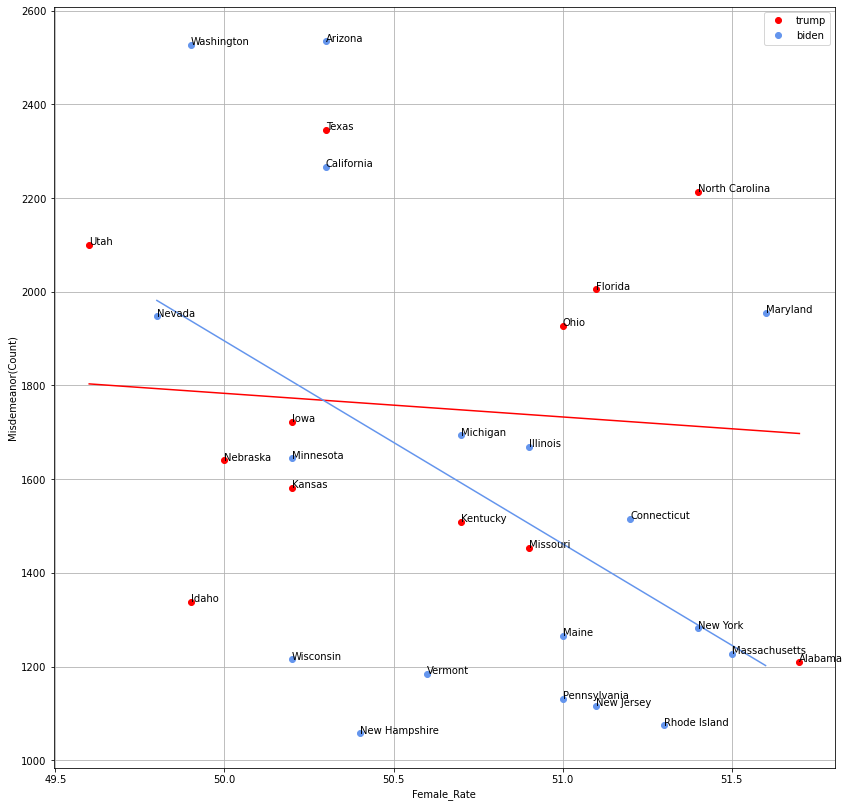

In [31]:
plt.figure(figsize=(14,14))

data='Female_Rate'

Female_Rate_trump=make_data(trump_data,data)
Female_Rate_biden=make_data(biden_data, data)

make_name(Female_Rate_trump,data)
make_name(Female_Rate_biden,data)

make_plt(Female_Rate_trump,data,0)
make_plt(Female_Rate_biden,data,1)

make_linear(Female_Rate_trump,data,0)
make_linear(Female_Rate_biden,data,1)

plt.legend()
#plt.xscale('log')
#plt.yscale('log')
plt.xlabel('Female_Rate')
plt.ylabel('Misdemeanor(Count)')
plt.grid(True)
plt.show()

In [32]:
def spearman_corr(dataframe,data,num):
    mis_body=pd.DataFrame({'Misdemeanor':dataframe['Misdemeanor_Result'],data:dataframe[data]})

    mis_spearman_corr=stats.spearmanr(mis_body.Female_Rate,mis_body.Misdemeanor)
    
    print("========misdemeanor_",politics[num],"======================================")
    print('mis_spearman_corr : {}\n\n'.format(mis_spearman_corr))
    
    fel_body=pd.DataFrame({'Felony':dataframe['Felony_Result'],data:dataframe[data]})

    fel_spearman_corr=stats.spearmanr(fel_body.Female_Rate,fel_body.Felony)
    
    print("========felony_",politics[num],"======================================")
    print('fel_spearman_corr : {}\n\n'.format(fel_spearman_corr))


spearman_corr(trump_data,'Female_Rate',0)
spearman_corr(biden_data,'Female_Rate',1)

========misdemeanor_ trump ======================================
mis_spearman_corr : SpearmanrResult(correlation=-0.014010529366766925, pvalue=0.9655299853727577)


========felony_ trump ======================================
fel_spearman_corr : SpearmanrResult(correlation=0.3677763958776318, pvalue=0.23952786899587408)


========misdemeanor_ biden ======================================
mis_spearman_corr : SpearmanrResult(correlation=-0.3431528671991748, pvalue=0.1632818713061163)


========felony_ biden ======================================
fel_spearman_corr : SpearmanrResult(correlation=-0.4051684456086642, pvalue=0.09531499583105443)




In [33]:
pearson_corr(Female_Rate_trump,data,0)
pearson_corr(Female_Rate_biden,data,1)

======== trump ======================================
mis_pearson_corr :              Misdemeanor  Female_Rate
Misdemeanor     1.000000    -0.090338
Female_Rate    -0.090338     1.000000


======== biden ======================================
mis_pearson_corr :              Misdemeanor  Female_Rate
Misdemeanor     1.000000    -0.488819
Female_Rate    -0.488819     1.000000




# Travel

======== trump ======================================
Score :  0.3540074602644754
RMSE :  278.2547463730643
MSE :  77425.70387913832 

기울기 :  [0.00688157]
절편 :  1574.7248237250503 


======== biden ======================================
Score :  0.11035784198821008
RMSE :  451.94110818381296
MSE :  204250.76526641293 

기울기 :  [0.00463321]
절편 :  1431.3382361783738 




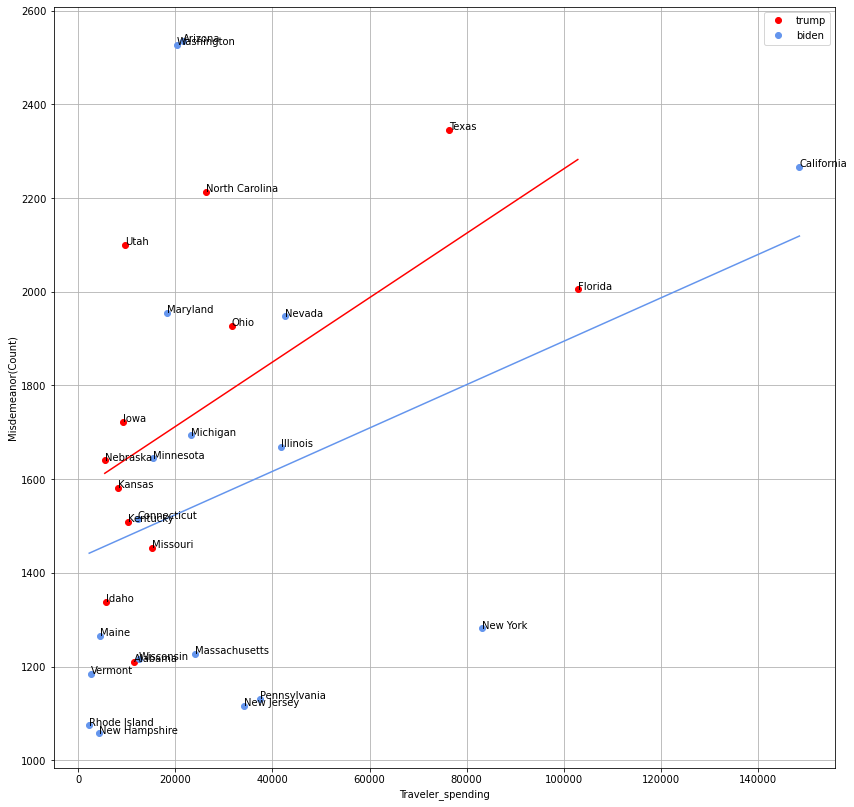

In [34]:
plt.figure(figsize=(14,14))

data='Traveler_spending'

Traveler_spending_trump=make_data(trump_data,data)
Traveler_spending_biden=make_data(biden_data, data)

make_name(Traveler_spending_trump,data)
make_name(Traveler_spending_biden,data)

make_plt(Traveler_spending_trump,data,0)
make_plt(Traveler_spending_biden,data,1)

make_linear(Traveler_spending_trump,data,0)
make_linear(Traveler_spending_biden,data,1)

plt.legend()
#plt.xscale('log')
#plt.yscale('log')
plt.xlabel('Traveler_spending')
plt.ylabel('Misdemeanor(Count)')
plt.grid(True)
plt.show()

In [35]:
def spearman_corr(dataframe,data,num):
    mis_body=pd.DataFrame({'Misdemeanor':dataframe['Misdemeanor_Result'],data:dataframe[data]})

    mis_spearman_corr=stats.spearmanr(mis_body.Traveler_spending,mis_body.Misdemeanor)
    
    print("========misdemeanor_",politics[num],"======================================")
    print('mis_spearman_corr : {}\n\n'.format(mis_spearman_corr))
    
    fel_body=pd.DataFrame({'Felony':dataframe['Felony_Result'],data:dataframe[data]})

    fel_spearman_corr=stats.spearmanr(fel_body.Traveler_spending,fel_body.Felony)
    
    print("========felony_",politics[num],"======================================")
    print('fel_spearman_corr : {}\n\n'.format(fel_spearman_corr))


spearman_corr(trump_data,'Traveler_spending',0)
spearman_corr(biden_data,'Traveler_spending',1)

========misdemeanor_ trump ======================================
mis_spearman_corr : SpearmanrResult(correlation=0.4895104895104896, pvalue=0.106252371759346)


========felony_ trump ======================================
fel_spearman_corr : SpearmanrResult(correlation=-0.013986013986013986, pvalue=0.9655902689187795)


========misdemeanor_ biden ======================================
mis_spearman_corr : SpearmanrResult(correlation=0.42414860681114547, pvalue=0.0793889023946049)


========felony_ biden ======================================
fel_spearman_corr : SpearmanrResult(correlation=0.3126934984520124, pvalue=0.2064536417438368)




In [36]:
pearson_corr(Traveler_spending_trump,data,0)
pearson_corr(Traveler_spending_biden,data,1)

======== trump ======================================
mis_pearson_corr :                    Misdemeanor  Traveler_spending
Misdemeanor           1.000000           0.594985
Traveler_spending     0.594985           1.000000


======== biden ======================================
mis_pearson_corr :                    Misdemeanor  Traveler_spending
Misdemeanor           1.000000           0.332202
Traveler_spending     0.332202           1.000000




# Temperature

======== trump ======================================
Score :  0.09848373870792526
RMSE :  328.7120404636758
MSE :  108051.60554579324 

기울기 :  [25.95596363]
절편 :  1419.853851293719 


======== biden ======================================
Score :  0.344317124296748
RMSE :  387.99049776987476
MSE :  150536.62635971518 

기울기 :  [92.51152592]
절편 :  721.5016281727417 




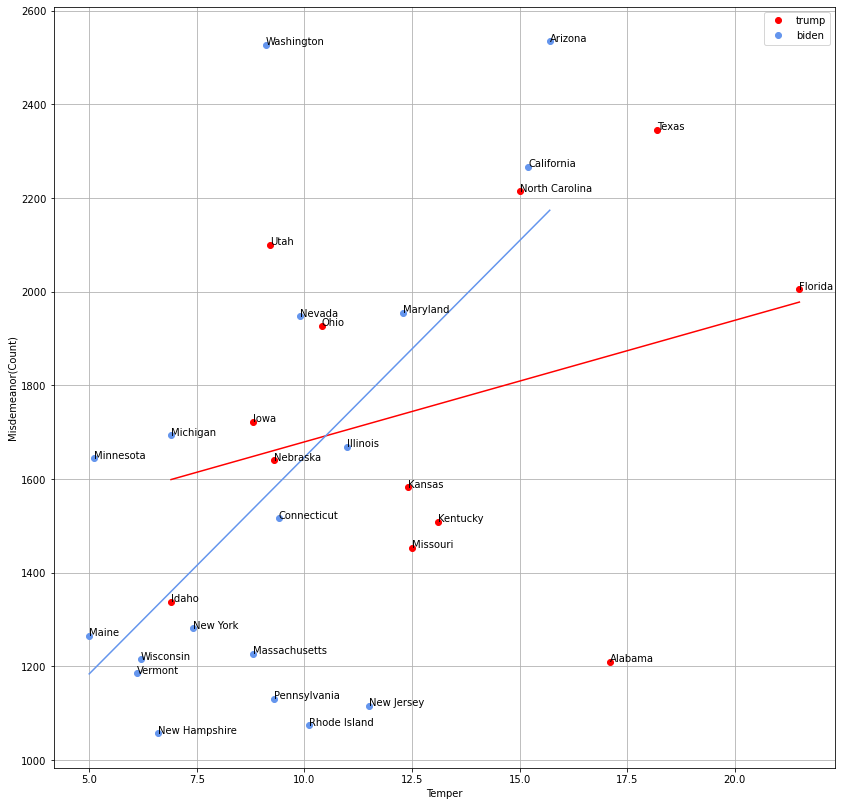

In [37]:
plt.figure(figsize=(14,14))

data='Temper'

Temper_trump=make_data(trump_data,data)
Temper_biden=make_data(biden_data, data)

make_name(Temper_trump,data)
make_name(Temper_biden,data)

make_plt(Temper_trump,data,0)
make_plt(Temper_biden,data,1)

make_linear(Temper_trump,data,0)
make_linear(Temper_biden,data,1)

plt.legend()
#plt.xscale('log')
#plt.yscale('log')
plt.xlabel('Temper')
plt.ylabel('Misdemeanor(Count)')
plt.grid(True)
plt.show()

In [38]:
def spearman_corr(dataframe,data,num):
    mis_body=pd.DataFrame({'Misdemeanor':dataframe['Misdemeanor_Result'],data:dataframe[data]})

    mis_spearman_corr=stats.spearmanr(mis_body.Temper,mis_body.Misdemeanor)
    
    print("========misdemeanor_",politics[num],"======================================")
    print('mis_spearman_corr : {}\n\n'.format(mis_spearman_corr))
    
    fel_body=pd.DataFrame({'Felony':dataframe['Felony_Result'],data:dataframe[data]})

    fel_spearman_corr=stats.spearmanr(fel_body.Temper,fel_body.Felony)
    
    print("========felony_",politics[num],"======================================")
    print('fel_spearman_corr : {}\n\n'.format(fel_spearman_corr))


spearman_corr(trump_data,'Temper',0)
spearman_corr(biden_data,'Temper',1)

========misdemeanor_ trump ======================================
mis_spearman_corr : SpearmanrResult(correlation=0.2447552447552448, pvalue=0.4432619364501832)


========felony_ trump ======================================
fel_spearman_corr : SpearmanrResult(correlation=0.3636363636363637, pvalue=0.2452650007307772)


========misdemeanor_ biden ======================================
mis_spearman_corr : SpearmanrResult(correlation=0.3973168214654283, pvalue=0.10253523912493745)


========felony_ biden ======================================
fel_spearman_corr : SpearmanrResult(correlation=0.4220846233230134, pvalue=0.08101904869498933)




In [39]:
pearson_corr(Temper_trump,data,0)
pearson_corr(Temper_biden,data,1)

======== trump ======================================
mis_pearson_corr :              Misdemeanor    Temper
Misdemeanor     1.000000  0.313821
Temper          0.313821  1.000000


======== biden ======================================
mis_pearson_corr :              Misdemeanor    Temper
Misdemeanor     1.000000  0.586785
Temper          0.586785  1.000000




In [40]:
List=['GDP','Education','Happy','PCPI','GDP_penalty','Area_police','MSA','Old_rate','Gender','Travel','Temperature']
Trump_corr=['0.5174','-0.1958','0.4265','0.4475','0.5664','0.2727','0.6083','-0.2066','-0.0140','0.4895','0.2447']
Biden_corr=['0.3312','-0.6367','0.1517','-0.1083','0.5149','0.7358','0.1879','-0.5599','-0.3431','0.4241','0.3973']
Trump_pvalue=['0.0848','0.5419','0.1666','0.1445','0.0548','0.3910','0.0358','0.5193','0.9655','0.1062','0.4432']
Biden_pvalue=['0.1793','0.0044','0.5479','0.6686','0.0287','0.0005','0.4552','0.0156','0.1632','0.0793','0.1025']
result_spear=pd.DataFrame({'corr(Trump)':Trump_corr,'corr(Biden)':Biden_corr,'pvalue(Trump)':Trump_pvalue,'pvalue(Biden)':Biden_pvalue},index=List)
result_spear

,corr(Trump),corr(Biden),pvalue(Trump),pvalue(Biden)
GDP,0.5174,0.3312,0.0848,0.1793
Education,-0.1958,-0.6367,0.5419,0.0044
Happy,0.4265,0.1517,0.1666,0.5479
PCPI,0.4475,-0.1083,0.1445,0.6686
GDP_penalty,0.5664,0.5149,0.0548,0.0287
Area_police,0.2727,0.7358,0.3910,0.0005
MSA,0.6083,0.1879,0.0358,0.4552
Old_rate,-0.2066,-0.5599,0.5193,0.0156
Gender,-0.0140,-0.3431,0.9655,0.1632
Travel,0.4895,0.4241,0.1062,0.0793


In [41]:
def spearman_corr(dataframe,data,num):
    mis_body=pd.DataFrame({'Misdemeanor':dataframe['Misdemeanor_Result'],data:dataframe[data]})

    mis_spearman_corr=stats.spearmanr(mis_body.Gun_ownership,mis_body.Misdemeanor)
    
    print("========misdemeanor_",politics[num],"======================================")
    print('mis_spearman_corr : {}\n\n'.format(mis_spearman_corr))
    
    fel_body=pd.DataFrame({'Felony':dataframe['Felony_Result'],data:dataframe[data]})

    fel_spearman_corr=stats.spearmanr(fel_body.Gun_ownership,fel_body.Felony)
    
    print("========felony_",politics[num],"======================================")
    print('fel_spearman_corr : {}\n\n'.format(fel_spearman_corr))


spearman_corr(trump_data,'Gun_ownership',0)
spearman_corr(biden_data,'Gun_ownership',1)

========misdemeanor_ trump ======================================
mis_spearman_corr : SpearmanrResult(correlation=-0.8616475560561659, pvalue=0.0003150070625274286)


========felony_ trump ======================================
fel_spearman_corr : SpearmanrResult(correlation=0.34325796948578974, pvalue=0.27467140968540055)


========misdemeanor_ biden ======================================
mis_spearman_corr : SpearmanrResult(correlation=-0.02790701028427024, pvalue=0.9124727871040188)


========felony_ biden ======================================
fel_spearman_corr : SpearmanrResult(correlation=-0.107493669243115, pvalue=0.6711647585528024)


